In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
df = pd.read_csv('sample_header.csv')

In [3]:
df.head()

,name,seq,len,fn
0,FM#T0859,GSMANKPMQPITSTANKIVWSDPTRLSTTFSASLLRQRVKVGIAEL...,133,testing
1,TBM#T0942,MFRQLKKNLVATLIAAMTIGQVAPAFADSADTLPDMGTSAGSTLSI...,487,testing
2,TBM#T0865,GHMEGKPKMEPAASSQAAVEELRTQVRELRSIIETMKDQQKREIKQ...,75,testing
3,TBM-hard#T0898,MSNFEKKYILELNDALSHLNHNSTSFDLLKVLISWLSNDIVIDKFK...,169,testing
4,TBM#T0893,LSQAQKMQAIGQLAGGVAHDFNNLLTAIQLRLDQLLHRHPVGDPSY...,242,testing


In [4]:
training_data = df.query("fn == 'training_100'")
valid_data = df.query("fn == 'validation'")
test_data = df.query("fn == 'testing'")

In [5]:
len(test_data.query("len <= 250"))

20

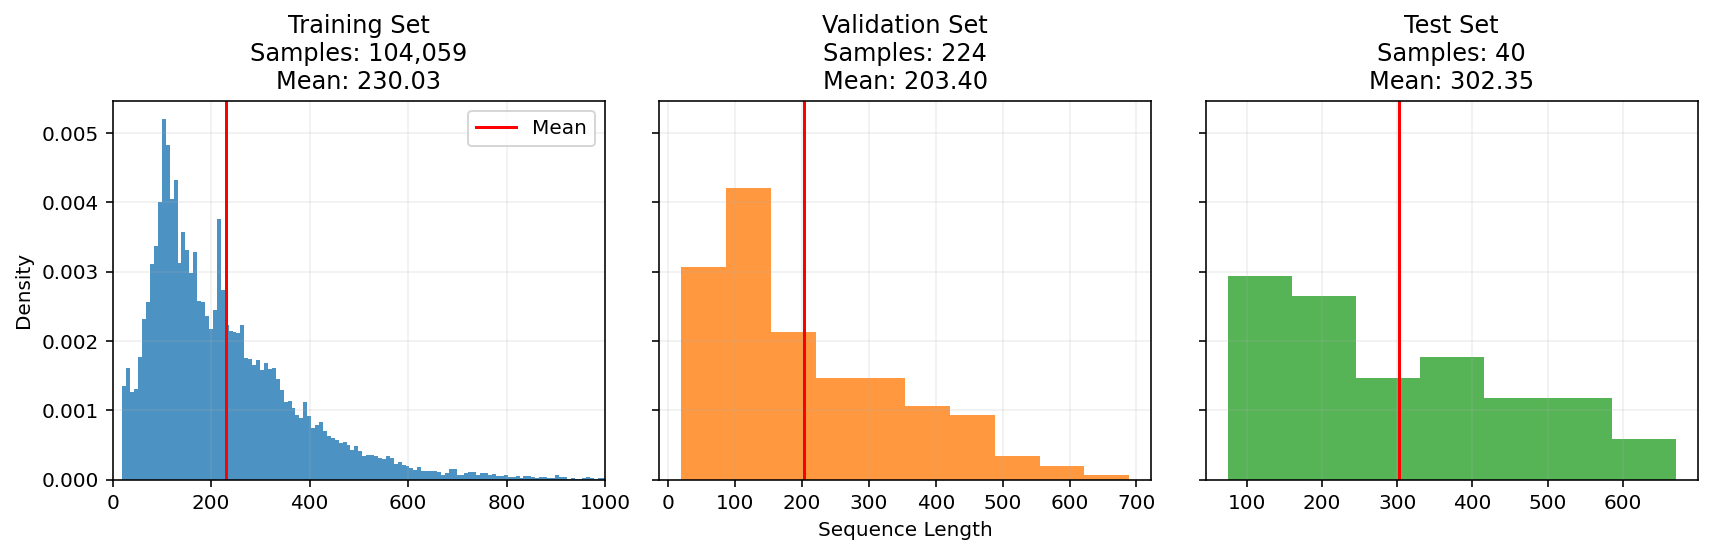

In [6]:
# average length of protein for each data set

fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

ax[0].hist(training_data['len'], bins='auto', density=True, color='C0', alpha=0.8)
ax[0].set_xlim([0, 1000])
ax[0].set_title(f'Training Set\nSamples: {len(training_data):,}\nMean: {training_data["len"].mean():.2f}')
ax[0].axvline(training_data['len'].mean(), color='r', label='Mean')
ax[0].legend()

ax[1].hist(valid_data['len'], bins='auto', density=True, color='C1', alpha=0.8)
ax[1].set_title(f'Validation Set\nSamples: {len(valid_data):,}\nMean: {valid_data["len"].mean():.2f}')
ax[1].axvline(valid_data['len'].mean(), color='r')

ax[2].hist(test_data['len'], bins='auto', density=True, color='C2', alpha=0.8)
ax[2].set_title(f'Test Set\nSamples: {len(test_data):,}\nMean: {test_data["len"].mean():.2f}')
ax[2].axvline(test_data['len'].mean(), color='r')

ax[0].set_ylabel('Density')
ax[1].set_xlabel('Sequence Length')

for a in ax:
    a.grid(alpha=0.2)

plt.tight_layout()
plt.savefig('proteinnet.png', bbox_inches='tight', dpi=300)

In [7]:
# nubmer of proteins in each train split and length

trainings = df[df['fn'].str.contains('training')]
trainings_grp = trainings.groupby('fn').agg({'len' : ['mean', 'std', 'count']}).reset_index()
trainings_grp.columns = ['_'.join(col).rstrip('_') for col in trainings_grp.columns.values]

In [8]:
# sort on cutoff

trainings_grp['cutoff'] = trainings_grp['fn'].str.split('_', expand=True)[1].astype(int)
trainings_grp.sort_values(by = 'cutoff', inplace=True)
trainings_grp.drop('cutoff', axis=1, inplace=True)

In [9]:
trainings_grp

,fn,len_mean,len_std,len_count
1,training_30,226.537571,194.979880,25299
2,training_50,232.712183,188.024787,34039
3,training_70,234.084967,184.303022,41522
4,training_90,230.238770,178.504938,49600
5,training_95,230.059748,179.219402,50914
0,training_100,230.029752,171.262095,104059


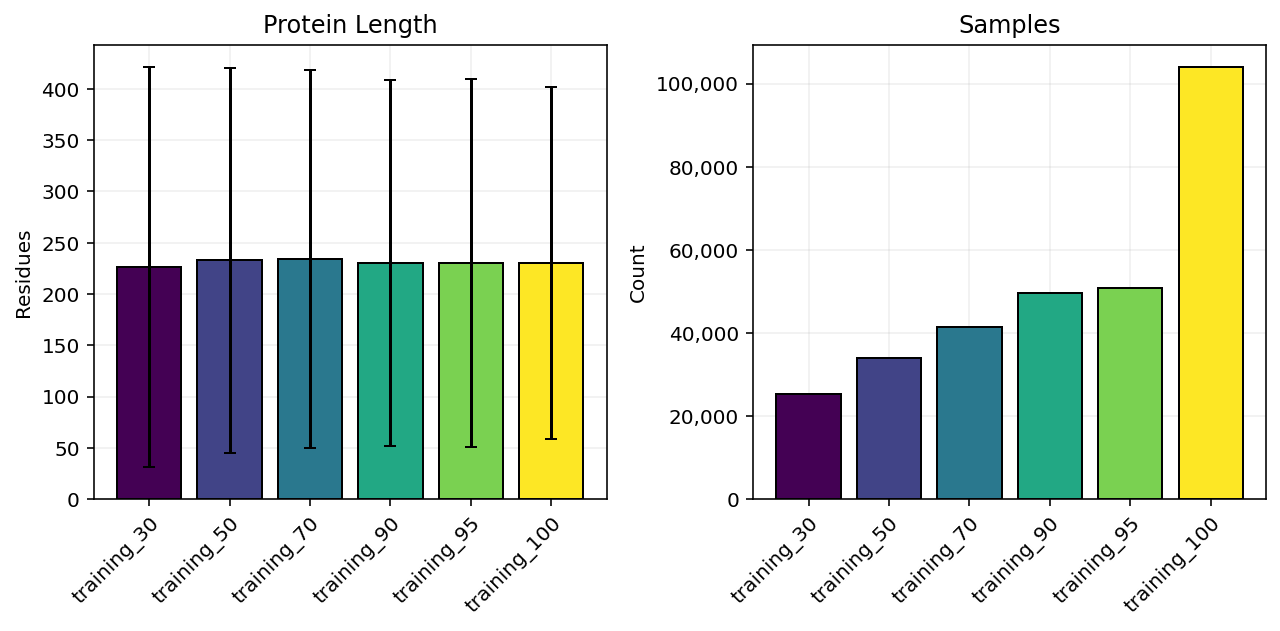

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4.5))

x = np.arange(len(trainings_grp))
colors = plt.cm.viridis(np.linspace(0, 1, len(trainings_grp)))

ax[0].bar(x, trainings_grp['len_mean'], yerr=trainings_grp['len_std'], color=colors, edgecolor='k', capsize=3)
ax[0].set_ylabel('Residues')
ax[0].set_title('Protein Length')

ax[1].bar(x, trainings_grp['len_count'], color=colors, edgecolor='k')
ax[1].set_title('Samples')
ax[1].set_ylabel('Count')
ax[1].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for a in ax:
    a.grid(alpha=0.2)
    a.set_axisbelow(True)
    a.set_xticks(x)
    a.set_xticklabels(trainings_grp['fn'], rotation=45, ha='right', rotation_mode='anchor')
    
plt.tight_layout()
plt.savefig('training_splits.png', bbox_inches='tight', dpi=300)